# I. Perkenalan


# Milestone 2

Nama  : Christian Herbert Fritz

Batch : CODA-RMT-0012

Topik : Analisis Efektivitas Pemasaran dan Retensi Pelanggan

Tujuan: Program ini dibuat untuk melakukan analisis komprehensif terhadap kinerja bisnis dan pengalaman pelanggan dengan menggunakan metode statistik dan visualisasi data.
Data transaksi, ulasan, dan dukungan yang digunakan untuk mengidentifikasi major pain points, merekomendasikan area fokus dalam meningkatkan pendapatan dan peningkatan kepuasan serta loyalitas pelanggan


==========================================================================================================

# II. Identifikasi Masalah

# Topik Permasalahan

Analisis Efektivitas Kampanye Pemasaran Terhadap Perilaku Pembelian dan Kualitas Layanan Pelanggan

# Latar Belakang

Di pasar ritel yang sangat kompetitif, terutama dengan meningkatnya e-commerce, pengalaman pelanggan telah menjadi diferensiator utama. Pelanggan kini tidak hanya mencari harga terbaik, tetapi juga pengalaman yang mulus mulai dari pencarian produk, proses pembelian, hingga dukungan purna jual.

Perusahaan saat ini menghadapi tantangan besar dalam mengelola dan mengintegrasikan berbagai sumber data pelanggan. Beberapa tantangan meliputi:

1. Mengidentifikasi produk atau kategori yang secara konsisten menghasilkan ketidakpuasan pelanggan (sering dinilai rendah atau menimbulkan tiket dukungan).

2. Memahami korelasi antara ulasan pelanggan (sentimen) dan perilaku pembelian di masa depan (misalnya, loyalitas dan pengeluaran).

3. Mengevaluasi efektivitas dukungan purna jual (support tickets) dan dampaknya terhadap kepuasan pelanggan.

Tanpa pemahaman yang terintegrasi antara data transaksi, ulasan, dan dukungan, perusahaan berisiko membuat keputusan operasional dan strategis yang tidak tepat, yang dapat mengakibatkan tingkat retensi pelanggan yang rendah dan penurunan Customer Lifetime Value (CLV).

# Problem Statement

Mengukur dampak berbagai jenis kampanye pemasaran terhadap Return on Investment serta menganalisis korelasi antara metode pembayaran dan channel interaksi dengan kepuasan pelanggan menggunakan data dari 1 Januari 2023 hingga 31 Desember 2024, dengan tujuan untuk mengoptimalkan anggaran dan strategi retensi pelanggan di masa mendatang

# Penjabaran Masalah

Meningkatkan efektivitas pemasaran dan layanan pelanggan dengan mengoptimalkan Return on Investment (ROI) sebesar 10% dan mengurangi rata-rata waktu resolusi tiket dukungan sebesar 15% melalui analisis data transaksi serta interaksi pelanggan periode 1 Januari 2023 hingga 31 Desember 2024

Metode 5W+1H

Apa jenis kampanye yang memberikan Return on Investment (ROI) tertinggi dan terendah?

Apa produk kategori yang paling sering menerima rating ulasan rendah, dan bagaimana distribusi rating tersebut secara keseluruhan?

Kapan terjadi puncak dan lembah dalam jumlah transaksi selama periode analisis (2023–2024), dan apakah ada korelasi dengan musim atau bulan tertentu?

Dimana saluran interaksi yang paling sering digunakan pelanggan, yang kemudian berakhir menjadi transaksi?

Siapa pelanggan (kelompok usia/gender) yang cenderung menerima diskon tertinggi, dan bagaimana korelasi antara umur dengan diskon yang diterima?

Bagaimana metode pembayaran yang berbeda memengaruhi rata-rata nilai transaksi?

Berapa nilai mean, median, dan sebaran (Standar Deviasi) dari Waktu Resolusi Tiket Dukungan?

Apakah terdapat perbedaan signifikan dalam Customer Satisfaction Score antara pelanggan yang menggunakan saluran interaksi 'web' dan 'mobile app' sebelum mengajukan tiket?


# Sumber Data

Retail Customer & Transaction Dataset
dataset diambil dari Kaggle

URL: https://www.kaggle.com/datasets/raghavendragandhi/retail-customer-and-transaction-dataset

# III. Data Loading

In [97]:
# Mengimport Library
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime


# Mengabaikan peringatan untuk kebersihan output
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

In [98]:
print("Data Loading")
files = {
    'campaigns': 'campaigns.csv',
    'reviews': 'customer_reviews_complete.csv',
    'customers': 'customers.csv',
    'interactions': 'interactions.csv',
    'tickets': 'support_tickets.csv',
    'transactions': 'transactions.csv'
}

DATE_COLUMNS = {
    'campaigns': ['start_date', 'end_date'],
    'reviews': ['transaction_date', 'review_date'],
    'customers': ['registration_date'],
    'interactions': ['interaction_date'],
    'tickets': ['submission_date', 'resolution_date'],
    'transactions': ['transaction_date']
}

try:
    df_campaigns = pd.read_csv(files['campaigns'], parse_dates=DATE_COLUMNS['campaigns'])
    df_reviews = pd.read_csv(files['reviews'], parse_dates=DATE_COLUMNS['reviews'])
    df_customers = pd.read_csv(files['customers'], parse_dates=DATE_COLUMNS['customers'])
    df_interactions = pd.read_csv(files['interactions'], parse_dates=DATE_COLUMNS['interactions'])
    df_tickets = pd.read_csv(files['tickets'], parse_dates=DATE_COLUMNS['tickets'])
    df_transactions = pd.read_csv(files['transactions'], parse_dates=DATE_COLUMNS['transactions'])
    print("Semua data berhasil dimuat")
except FileNotFoundError as e:
    print(f"ERROR: File {e.filename} tidak ditemukan. Pastikan semua file csv tersedia")
    exit()

Data Loading
Semua data berhasil dimuat


In [99]:
# Menampilkan output setiap dataframe

# Data Campaigns
print("\nData Campaigns")
print(df_campaigns.head())

print("\nInformasi Tipe Data")
print(df_campaigns.info())


Data Campaigns
                            campaign_id                campaign_name  \
0  0d120125-26cc-4023-9a54-bebbc0159b76       Black Friday Sale 2022   
1  152bbef1-7ced-46ec-b252-fb396a78261e  Limited Time Promotion 2023   
2  eedd0753-1436-4e7f-8f5f-4a237aa3204a     Back to School Sale 2024   
3  09e1626c-5b59-4fa7-b5e2-a1d1446c9fd9         Weekend Blowout 2020   
4  3de639fc-f687-440f-bccf-d3700a3d38b8    Limited Time Special 2021   

          campaign_type start_date   end_date          target_segment  \
0    Online Display Ads 2020-09-29 2020-11-13         Southern States   
1  Influencer Marketing 2020-11-12 2020-11-26  Technology Enthusiasts   
2   Print Advertisement 2022-03-05 2022-06-03           Seniors (60+)   
3       Email Marketing 2022-03-12 2022-06-10  Technology Enthusiasts   
4   Print Advertisement 2021-08-12 2021-11-10         Loyal Customers   

     budget  impressions   clicks  conversions  conversion_rate      roi  
0  14528.90     740965.0   1189.0    

In [100]:
# Data Customer Reviews
print("\nData Customer Reviews")
print(df_reviews.head())

print("\nInformasi Tipe Data")
print(df_reviews.info())


Data Customer Reviews
    review_id                           customer_id  product_name  \
0  rev_000001  e9848049-323f-4f95-a26e-3cffc219d591     Bookshelf   
1  rev_000002  24bcc3c6-ce17-423f-87f5-a1f6d1114ba7  Oculus Quest   
2  rev_000003  8806399f-1c9b-47f7-b8ca-fac5468438ff    OnePlus 10   
3  rev_000004  62ab496d-f69a-48af-b44c-08ac79b6f68d     iPhone 13   
4  rev_000005  1b7daed4-aaa6-41b1-9826-0d51d67614e3     Bookshelf   

  product_category         full_name transaction_date review_date  rating  \
0        Furniture  Patrick Guerrero       2024-05-30  2024-06-12       5   
1  Gaming Consoles      Katie Burton       2024-03-10  2024-04-05       5   
2      Smartphones   Fernando Rogers       2024-06-14  2024-06-29       4   
3      Smartphones       Sara Howell       2024-03-27  2024-04-06       4   
4        Furniture         Kelly Kim       2023-08-16  2023-09-01       4   

                                        review_title  \
0       Sturdy and Elegant Addition to My S

In [101]:
# Data Customers
print("\nData Customers")
print(df_customers.head())

print("\nInformasi Tipe Data")
print(df_customers.info())


Data Customers
                            customer_id       full_name   age  gender  \
0  4c30e132-0704-4459-a509-9eddde934977    Mark Johnson  40.0    Male   
1  68bec407-275f-4b5b-9a82-13d02f54626a    Robert Smith  33.0    Male   
2  4466459f-76c8-433c-814e-6d59cb4131fc    Jamie Chavez  42.0  Female   
3  04c36a25-02f3-462c-92b0-6bf291c57706  Thomas Bradley  53.0    Male   
4  e916df3d-c3f5-40b0-8ae2-5d043be88300    Jane Ferrell  32.0  Female   

                        email               phone  \
0      mark.johnson@yahoo.com        989.608.3863   
1            smithr@yahoo.com  (518)349-5931x0341   
2           jchavez@gmail.com    364.583.5030x564   
3  thomas.bradley@hotmail.com   (332)887-1012x269   
4    jane.ferrell@hotmail.com          5484281489   

                street_address        city     state  zip_code  \
0           819 Johnson Course     Houston     Texas   29158.0   
1  35116 Michael Key Suite 078      Austin     Texas   16862.0   
2           419 Amanda Garde

In [102]:
# Data Interactions
print("\nData Interactions")
print(df_interactions.head())

print("\nInformasi Tipe Data")
print(df_interactions.info())


Data Interactions
                         interaction_id                           customer_id  \
0  423db3d3-659d-433f-859a-eea2ff1e2d2c  00012aa8-e99c-4e30-b3f6-1f7e36adc517   
1  8cf67dd6-63f8-4333-924d-2126aa87a91d  00012aa8-e99c-4e30-b3f6-1f7e36adc517   
2  2e8e17c8-c40f-46ea-810f-08c987eb07c7  00012aa8-e99c-4e30-b3f6-1f7e36adc517   
3  d5d18036-735c-4d70-842a-0f82a4873fbf  00012aa8-e99c-4e30-b3f6-1f7e36adc517   
4  ef756343-1635-4510-85c8-41a399adb8f8  00012aa8-e99c-4e30-b3f6-1f7e36adc517   

  channel interaction_type    interaction_date  duration   page_or_product  \
0     NaN           review 2023-03-11 08:37:00     128.0              home   
1     web     wishlist_add 2023-03-22 04:57:00       9.0       Dell XPS 15   
2     web           review 2023-04-11 14:47:00     205.0  category_kitchen   
3     web        page_view 2023-05-23 07:20:00      65.0  category_laptops   
4     web     product_view 2023-06-06 02:57:00     146.0   Bose Headphones   

                         

In [103]:
# Data Tickets
print("\nData Tickets")
print(df_tickets.head())

print("\nInformasi Tipe Data")
print(df_tickets.info())


Data Tickets
                              ticket_id                           customer_id  \
0  b38add31-c7bf-4dcd-ae90-6d7c3cca0728  20b8b390-06f6-4558-9641-9d87ca9de14c   
1  d391b9a7-80a2-4f12-bafc-678b0cdce568  53028554-1256-42c4-89ac-20eada75c706   
2  5efa523c-4793-4dc0-9a6a-142507fe1d45  763562c0-e28a-4859-ac64-c94e94d04bc8   
3  f599efaf-e9ab-46d9-b5e3-5df3e5d9084e  b3cebbcc-3232-4425-9af8-af2685b6bece   
4  a25e2a1b-4000-4eae-ab96-fe7f9f227178  3382f162-464f-4ee1-a68e-8ad71fc48f8b   

    issue_category priority submission_date     resolution_date  \
0        Technical      NaN      2024-10-17 2024-10-18 11:00:00   
1    Website Issue     High      2025-01-06 2025-01-07 13:00:00   
2    Website Issue      Low      2022-01-28 2022-01-31 02:00:00   
3              NaN     High      2021-04-16 2021-04-16 21:00:00   
4  Product Inquiry      Low      2025-01-14 2025-01-16 21:00:00   

  resolution_status  resolution_time_hours  customer_satisfaction_score  \
0          Resolved  

In [104]:
# Data Transactions
print("\nData Transactions")
print(df_transactions.head())

print("\nInformasi Tipe Data")
print(df_transactions.info())


Data Transactions
                         transaction_id                           customer_id  \
0  53e3d9f5-6231-46de-aa39-e5f8eaae2eee  727839b2-f084-4e94-94d8-ae59cc8e4b84   
1  ae6e6edf-f2fe-45c8-989c-c01e77eade0c  c4ac244c-989e-46fb-b243-91dd1d5cf739   
2  ba85240a-2b5d-4987-ac0a-efb6a4a57d6d  d296bf0d-92bb-4670-a578-2fd3553cf7c8   
3  3725a285-2a2b-4a80-b317-7c8041cd9b8b  7b1b9980-9d65-40fc-8ad6-6afaae4699e4   
4  de1b05a5-68c7-4b00-a068-e8c2f13f0dab  8595dcfa-2bfc-46f4-a15a-042af85b78cd   

          product_name      product_category  quantity    price  \
0        Ring Doorbell    Smart Home Devices       1.0   140.07   
1         Oculus Quest       Gaming Consoles       1.0   339.57   
2   Samsung Galaxy S22           Smartphones       2.0  1335.88   
3  External Hard Drive  Computer Accessories       1.0    91.56   
4          MacBook Pro               Laptops       1.0   985.15   

  transaction_date store_location payment_method  discount_applied  
0       2020-12-06    

# IV. Data Cleaning

In [105]:
# df_transactions
print("\nCleaning df_transactions")

# Filter: Hanya data 2023-2024
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)
df_transactions_clean = df_transactions[(df_transactions['transaction_date'] >= start_date) &
                                        (df_transactions['transaction_date'] <= end_date)].copy()

# Imputasi Missing Values dengan 'Unknown' untuk kategorikal yang hilang
df_transactions_clean['product_name'].fillna('Unknown Product', inplace=True)
df_transactions_clean['product_category'].fillna('Unknown Category', inplace=True)
df_transactions_clean['store_location'].fillna('Unknown Location', inplace=True)
df_transactions_clean['payment_method'].fillna('Unknown Method', inplace=True)

# Imputasi dengan Median/0 untuk numerik yang hilang
median_price = df_transactions_clean['price'].median()
median_discount = df_transactions_clean['discount_applied'].median()
median_quantity = df_transactions_clean['quantity'].median()

df_transactions_clean['price'].fillna(median_price, inplace=True)
df_transactions_clean['discount_applied'].fillna(median_discount, inplace=True)
df_transactions_clean['quantity'].fillna(median_quantity, inplace=True)

# Memastikan Kolom 'revenue', jika memiliki missing values atau belum dihitung ulang setelah imputasi
df_transactions_clean['revenue'] = df_transactions_clean['price'] * \
                                   (1 - df_transactions_clean['discount_applied'] / 100) * \
                                   df_transactions_clean['quantity']
df_transactions_clean['revenue'].fillna(0, inplace=True) # Imputasi sisa revenue NaN jika ada (jarang)

print("df_transactions_clean \nRows:", len(df_transactions_clean))


Cleaning df_transactions
df_transactions_clean 
Rows: 20126


In [106]:
# df_customers
print("Cleaning df_customers")
df_customers_clean = df_customers.copy()

# Imputasi Missing Values (Age dan Gender)
df_customers_clean['age'].fillna(df_customers_clean['age'].median(), inplace=True)
df_customers_clean['gender'].fillna('Unknown', inplace=True)

# Mengubah tipe data Age
df_customers_clean['age'] = df_customers_clean['age'].astype(int)

# Menghapus kolom yang kurang relevan untuk analisis demografi (Email, Phone, Address, Zip Code)
df_customers_clean.drop(columns=['email', 'phone', 'street_address', 'city', 'state', 'zip_code'], inplace=True, errors='ignore')

print("df_customers_clean \nRows:", len(df_customers_clean))

Cleaning df_customers
df_customers_clean 
Rows: 5000


In [107]:
# df_campaigns
print("Cleaning df_campaigns")
df_campaigns_clean = df_campaigns.copy()

# Imputasi Missing Values (ROI dan Conversions), Imputasi 0 jika hilang (jika kampanye gagal/data tidak tercatat)
df_campaigns_clean['roi'].fillna(0, inplace=True)

# Imputasi dengan median atau 0 (jika tidak ada konversi)
df_campaigns_clean['conversions'].fillna(0, inplace=True)
df_campaigns_clean['conversions'] = df_campaigns_clean['conversions'].astype(int)

print("df_campaigns_clean \nRows:", len(df_campaigns_clean))

Cleaning df_campaigns
df_campaigns_clean 
Rows: 200


In [108]:
# df_reviews
print("Cleaning df_reviews")
df_reviews_clean = df_reviews.copy()

# Imputasi Missing Values
df_reviews_clean['product_category'].fillna('Unknown Category', inplace=True)
df_reviews_clean['rating'].fillna(df_reviews_clean['rating'].median(), inplace=True)
df_reviews_clean['rating'] = df_reviews_clean['rating'].astype(int)

# Drop kolom teks ulasan (review_text) untuk efisiensi, jika hanya fokus pada rating/kategori
df_reviews_clean.drop(columns=['review_text'], inplace=True, errors='ignore')

print("df_reviews_clean \nRows:", len(df_reviews_clean))

Cleaning df_reviews
df_reviews_clean 
Rows: 1000


In [109]:
# df_tickets
print("Cleaning df_tickets")
df_tickets_clean = df_tickets.copy()

# Imputasi Missing Values (CSAT dan Resolution Time)
median_csat = df_tickets_clean['customer_satisfaction_score'].median()
median_res_time = df_tickets_clean['resolution_time_hours'].median()

df_tickets_clean['customer_satisfaction_score'].fillna(median_csat, inplace=True)
df_tickets_clean['resolution_time_hours'].fillna(median_res_time, inplace=True)

# Imputasi/Drop Prioritas (karena banyak nilai yang hilang, dan mungkin kurang krusial dari CSAT/Waktu Resolusi)
df_tickets_clean['priority'].fillna('Unknown', inplace=True)

print("df_tickets_clean \nRows:", len(df_tickets_clean))

Cleaning df_tickets
df_tickets_clean 
Rows: 3000


In [110]:
# df_interactions
print("Cleaning df_interactions")
df_interactions_clean = df_interactions.copy()

# Imputasi Missing Values, Channel dan Interaction Type diisi 'Unknown'
df_interactions_clean['channel'].fillna('Unknown', inplace=True)
df_interactions_clean['interaction_type'].fillna('Unknown', inplace=True)
df_interactions_clean['page_or_product'].fillna('Unknown', inplace=True)

# Duration (numerik) diisi median
df_interactions_clean['duration'].fillna(df_interactions_clean['duration'].median(), inplace=True)

print("df_interactions_clean \nRows:", len(df_interactions_clean))

Cleaning df_interactions
df_interactions_clean 
Rows: 100000


In [111]:
# Pengecekan dan Penghapusan Duplikasi

# Data cleaning (imputasi dan filtering) sudah diterapkan
df_list = {
    'df_campaigns': df_campaigns_clean,
    'df_reviews': df_reviews_clean,
    'df_customers': df_customers_clean,
    'df_interactions': df_interactions_clean,
    'df_tickets': df_tickets_clean,
    'df_transactions': df_transactions_clean
}

print("Pengecekan dan Penghapusan Duplikasi")

total_duplicates = 0

for name, df in df_list.items():
    initial_rows = len(df)

    # Identifier unik untuk setiap DataFrame
    if name == 'df_transactions':
        subset = ['transaction_id']
    elif name == 'df_customers':
        subset = ['customer_id']
    elif name == 'df_reviews':
        subset = ['review_id']
    elif name == 'df_tickets':
        subset = ['ticket_id']
    elif name == 'df_campaigns':
        subset = ['campaign_id']
    else: # df_interactions tidak memiliki ID unik yang ketat
        subset = df.columns.tolist()

    # Hitung dan hapus duplikasi
    duplicates = df.duplicated(subset=subset).sum()
    if duplicates > 0:
        df_list[name] = df.drop_duplicates(subset=subset, keep='first')
        print(f"[{name}]: {duplicates} duplikasi dihapus. Sisa baris: {len(df_list[name])}")
        total_duplicates += duplicates
    else:
        print(f"[{name}]: Tidak ada duplikasi yang ditemukan")

print(f"\nTotal baris duplikasi yang dihapus dari seluruh dataset: {total_duplicates}")
df_campaigns_clean = df_list['df_campaigns']
df_reviews_clean = df_list['df_reviews']
df_customers_clean = df_list['df_customers']
df_interactions_clean = df_list['df_interactions']
df_tickets_clean = df_list['df_tickets']
df_transactions_clean = df_list['df_transactions']


Pengecekan dan Penghapusan Duplikasi
[df_campaigns]: Tidak ada duplikasi yang ditemukan
[df_reviews]: Tidak ada duplikasi yang ditemukan
[df_customers]: Tidak ada duplikasi yang ditemukan
[df_interactions]: Tidak ada duplikasi yang ditemukan
[df_tickets]: Tidak ada duplikasi yang ditemukan
[df_transactions]: Tidak ada duplikasi yang ditemukan

Total baris duplikasi yang dihapus dari seluruh dataset: 0


In [112]:
# Pengecekan Inkonsistensi Data
print("\nAnalisis dan Standardisasi Inkonsistensi Data Kategorikal")

# df_customers: Gender
print("df_customers: Analisis 'gender'")
gender_counts = df_customers_clean['gender'].value_counts()
print(gender_counts)

# df_transactions: payment_method
print("\ndf_transactions: Analisis 'payment_method'")
payment_counts = df_transactions_clean['payment_method'].value_counts()
print(payment_counts)

# df_reviews: product_category (Pengecekan Inkonsistensi)
print("\ndf_reviews: Analisis 'product_category'")
category_counts = df_reviews_clean['product_category'].value_counts().head(10)
print(category_counts)

# df_interactions: channel
print("\ndf_interactions: Analisis 'channel'")
channel_counts = df_interactions_clean['channel'].value_counts()
print(channel_counts)


Analisis dan Standardisasi Inkonsistensi Data Kategorikal
df_customers: Analisis 'gender'
gender
Female               2413
Male                 2297
Non-binary            125
Unknown               112
Prefer not to say      53
Name: count, dtype: int64

df_transactions: Analisis 'payment_method'
payment_method
Credit Card       6735
Debit Card        5016
PayPal            2993
Apple Pay         1984
Google Pay        1020
Gift Card         1005
Cash               965
Unknown Method     408
Name: count, dtype: int64

df_reviews: Analisis 'product_category'
product_category
Smartphones                 143
Kitchen Appliances          125
Furniture                   124
Smart Home Devices          123
Home Decor                   94
Gaming Consoles              68
Laptops                      60
TVs                          51
Audio Equipment              51
Small Kitchen Appliances     37
Name: count, dtype: int64

df_interactions: Analisis 'channel'
channel
web               55724
mobi

In [113]:
# Info untuk setiap Dataframes
print("\nPemeriksaan DataFrames Cleaned")

print("1. df_transactions_clean (2023-2024):")
df_transactions_clean.info(verbose=False)
print(f"Rows: {len(df_transactions_clean)}")
print("-" * 20)

print("2. df_customers_clean:")
df_customers_clean.info(verbose=False)
print(f"Rows: {len(df_customers_clean)}")
print("-" * 20)

print("3. df_campaigns_clean:")
df_campaigns_clean.info(verbose=False)
print(f"Rows: {len(df_campaigns_clean)}")
print("-" * 20)

print("4. df_reviews_clean:")
df_reviews_clean.info(verbose=False)
print(f"Rows: {len(df_reviews_clean)}")
print("-" * 20)

print("5. df_tickets_clean:")
df_tickets_clean.info(verbose=False)
print(f"Rows: {len(df_tickets_clean)}")
print("-" * 20)

print("6. df_interactions_clean:")
df_interactions_clean.info(verbose=False)
print(f"Rows: {len(df_interactions_clean)}")
print("-" * 20)

print("\nProses data cleaning selesai")


Pemeriksaan DataFrames Cleaned
1. df_transactions_clean (2023-2024):
<class 'pandas.core.frame.DataFrame'>
Index: 20126 entries, 3 to 32293
Columns: 11 entries, transaction_id to revenue
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 1.8+ MB
Rows: 20126
--------------------
2. df_customers_clean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 6 entries, customer_id to preferred_channel
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 234.5+ KB
Rows: 5000
--------------------
3. df_campaigns_clean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 12 entries, campaign_id to roi
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 18.9+ KB
Rows: 200
--------------------
4. df_reviews_clean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 9 entries, review_id to review_title
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 70.4+ 

In [114]:
# Menyimpan DataFrames yang Sudah di-Clean
import pandas as pd
import os

cleaned_dataframes = {
    'df_campaigns_clean': df_campaigns_clean,
    'df_reviews_clean': df_reviews_clean,
    'df_customers_clean': df_customers_clean,
    'df_interactions_clean': df_interactions_clean,
    'df_tickets_clean': df_tickets_clean,
    'df_transactions_clean': df_transactions_clean
}

output_dir = 'cleaned_data'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Memulai proses penyimpanan file CSV")

for df_name, df in cleaned_dataframes.items():
    file_path = os.path.join(output_dir, f'{df_name}.csv')
    df.to_csv(file_path, index=False)
    print(f"Berhasil menyimpan {df_name} ke: {file_path}")

print("\nSemua dataframes yang sudah di-clean berhasil disimpan ke dalam folder 'cleaned_data'")

Memulai proses penyimpanan file CSV
Berhasil menyimpan df_campaigns_clean ke: cleaned_data/df_campaigns_clean.csv
Berhasil menyimpan df_reviews_clean ke: cleaned_data/df_reviews_clean.csv
Berhasil menyimpan df_customers_clean ke: cleaned_data/df_customers_clean.csv
Berhasil menyimpan df_interactions_clean ke: cleaned_data/df_interactions_clean.csv
Berhasil menyimpan df_tickets_clean ke: cleaned_data/df_tickets_clean.csv
Berhasil menyimpan df_transactions_clean ke: cleaned_data/df_transactions_clean.csv

Semua dataframes yang sudah di-clean berhasil disimpan ke dalam folder 'cleaned_data'


# V. Analisis dan perhitungan

In [115]:
# Import Libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # Untuk T-Test
from datetime import datetime

# Mengabaikan peringatan (setting up environment)
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

Analisis Pemasaran: ROI Tertinggi dan Terendah
----------------------------------------------

### Rata-Rata ROI (Return on Investment) per Jenis Kampanye
ROI Tertinggi:
campaign_type
Search Engine Marketing    8560.18%
Email Marketing            2580.10%
In-Store Promotion         2431.74%
Name: roi, dtype: object

ROI Terendah:
campaign_type
Print Advertisement    212.49%
TV Advertisement       202.30%
SMS Marketing          140.92%
Name: roi, dtype: object


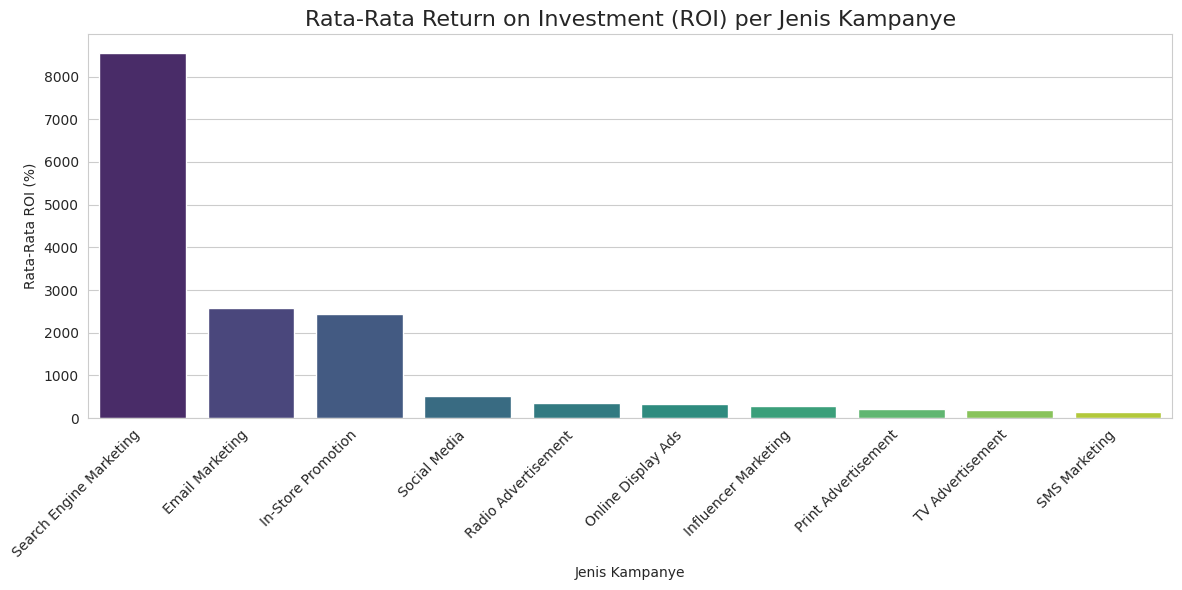

In [116]:
# ANALISIS PEMASARAN: ROI TERTINGGI & TERENDAH (Q1)

print("Analisis Pemasaran: ROI Tertinggi dan Terendah")
print("----------------------------------------------")

# Menghitung rata-rata ROI per Jenis Kampanye
df_roi_mean = df_campaigns_clean.groupby('campaign_type')['roi'].mean().sort_values(ascending=False)

# Tampilkan Hasil
print("\n### Rata-Rata ROI (Return on Investment) per Jenis Kampanye")
print("ROI Tertinggi:")
print(df_roi_mean.head(3).map('{:.2f}%'.format))
print("\nROI Terendah:")
print(df_roi_mean.tail(3).map('{:.2f}%'.format))

# Visualisasi rata-rata ROI per Jenis Kampanye
plt.figure(figsize=(12, 6))
sns.barplot(x=df_roi_mean.index, y=df_roi_mean.values, palette='viridis')
plt.title('Rata-Rata Return on Investment (ROI) per Jenis Kampanye', fontsize=16)
plt.xlabel('Jenis Kampanye')
plt.ylabel('Rata-Rata ROI (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**
Jenis kampanye Search Engine Marketing memberikan ROI tertinggi, menunjukkan efektivitas biaya dalam menghasilkan pendapatan.
Sebaliknya, SMS Marketing memberikan ROI terendah, mengindikasikan bahwa dana yang diinvestasikan pada jenis kampanye ini kurang efisien dan perlu dievaluasi atau dialokasikan ulang.

In [125]:
 df_low_ratings['product_category'].value_counts().drop('Unknown Category', errors='ignore').head(5)

,count
product_category,
Smartphones,15
Furniture,13
Kitchen Appliances,13
Home Decor,10
Gaming Consoles,9


Analisis Kualitas Produk: Rating Rendah & Distribusi
----------------------------------------------------

Distribusi Rating Keseluruhan
rating
1     3.00%
2     7.60%
3    14.20%
4    35.00%
5    40.20%
Name: proportion, dtype: object


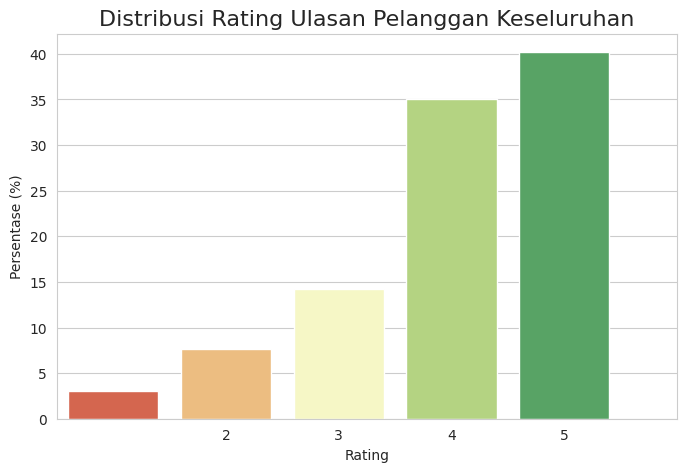

------------------------------------------------------------------------------------------

Kategori Produk Paling Sering Menerima Rating Rendah
product_category
Smartphones           15
Furniture             13
Kitchen Appliances    13
Home Decor            10
Gaming Consoles        9
Name: count, dtype: int64


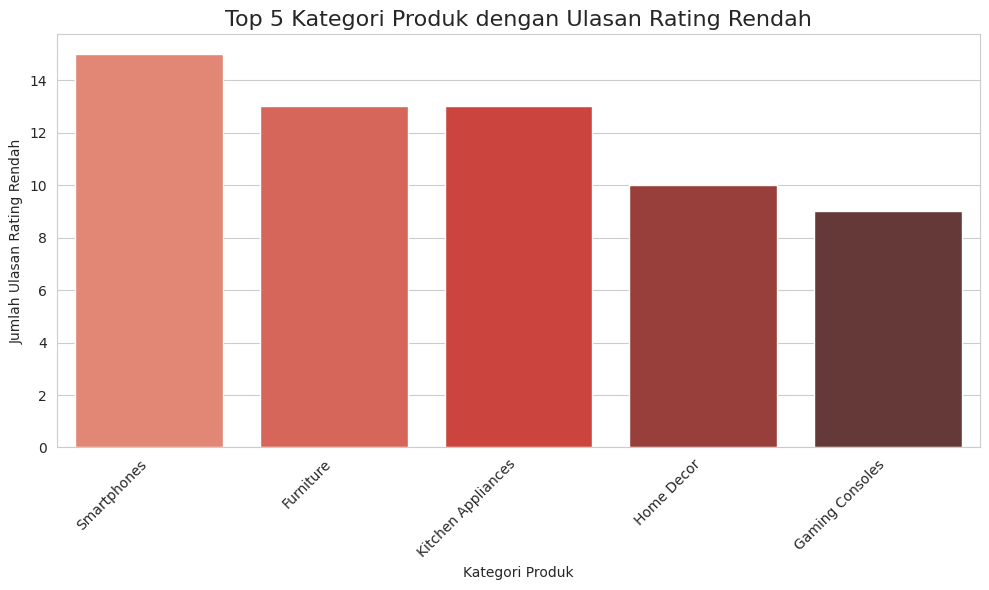

In [130]:
# ANALISIS KUALITAS PRODUK: RATING RENDAH & DISTRIBUSI (Q2)

print("Analisis Kualitas Produk: Rating Rendah & Distribusi")
print("----------------------------------------------------")

# Menghitung kategori dengan Rating Rendah (Rating 1 & 2)
df_low_ratings = df_reviews_clean[df_reviews_clean['rating'].isin([1, 2])]
low_rating_category_counts = df_low_ratings['product_category'].value_counts().drop('Unknown Category', errors='ignore').head(5)

# Menghitung distribusi rating keseluruhan
overall_rating_distribution = df_reviews_clean['rating'].value_counts(normalize=True).sort_index() * 100

# Menampilkan Hasil
print("\nDistribusi Rating Keseluruhan")
print(overall_rating_distribution.map('{:.2f}%'.format))

# Visualisasi Distribusi Rating Keseluruhan
plt.figure(figsize=(8, 5))
sns.barplot(x=overall_rating_distribution.index, y=overall_rating_distribution.values, palette='RdYlGn')
plt.title('Distribusi Rating Ulasan Pelanggan Keseluruhan', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Persentase (%)')
plt.xticks(ticks=[1, 2, 3, 4, 5])
plt.show()

print ("------------------------------------------------------------------------------------------")

print("\nKategori Produk Paling Sering Menerima Rating Rendah")
print(low_rating_category_counts)

# Visualisasi Top Kategori dengan Rating Rendah
plt.figure(figsize=(10, 6))
sns.barplot(x=low_rating_category_counts.index, y=low_rating_category_counts.values, palette='Reds_d')
plt.title('Top 5 Kategori Produk dengan Ulasan Rating Rendah', fontsize=16)
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Ulasan Rating Rendah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Insight:**
Sebagian besar ulasan memberikan rating tinggi (4 dan 5), menunjukkan tingkat kepuasan produk yang cenderung positif, namun persentase rating 1 dan 2 (terendah) masih cukup signifikan. Hal ini menunjukkan bahwa meskipun rata-rata kepuasan tinggi, ada sebagian produk atau pengalaman yang gagal memenuhi harapan pelanggan, memicu ulasan negatif yang harus diatasi

**Insight:**
Kategori Smartphones dan Furniture adalah yang paling sering menerima rating rendah. Mengidentifikasi Pain Point kualitas produk utama yang memerlukan investigasi mendalam terhadap kualitas, deskripsi produk, atau proses pengiriman/perakitan yang mungkin mengecewakan pelanggan.
Hal ini perlu menjadi fokus tim Quality Assurance (QA) atau Product Development (PD) untuk menyelidiki masalah kualitas atau harapan pelanggan di kategori-kategori tersebut

Analisis Kinerja Penjualan
--------------------------

Puncak dan Lembah Transaksi (2023-2024)
Puncak Transaksi: 2024-12 (1630 transaksi)
Lembah Transaksi: 2023-02 (461 transaksi)


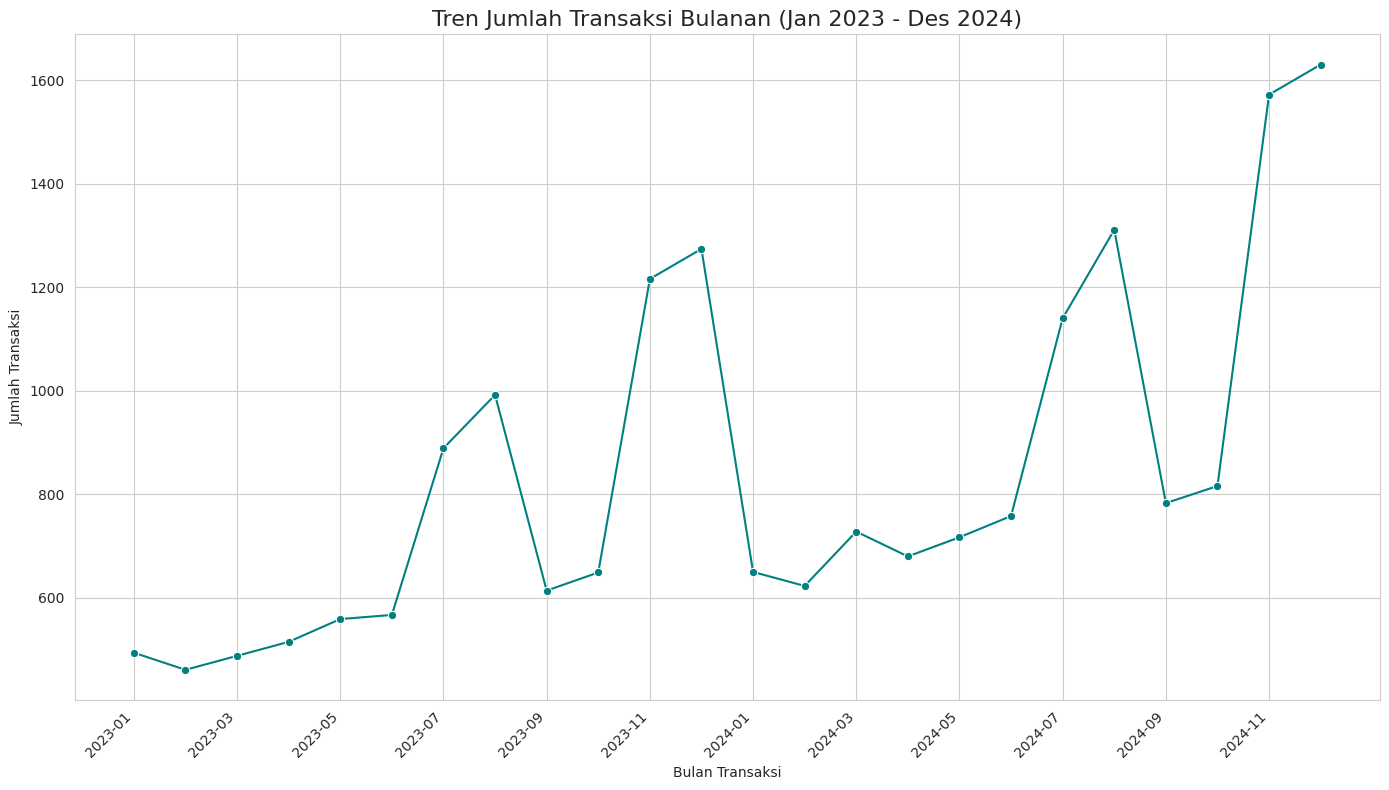

In [118]:
# ANALISIS KINERJA PENJUALAN (Q3)

print("Analisis Kinerja Penjualan")
print("--------------------------")

# Puncak & Lembah Transaksi
df_transactions_clean['transaction_month_year'] = df_transactions_clean['transaction_date'].dt.to_period('M')
transactions_monthly = df_transactions_clean.groupby('transaction_month_year')['transaction_id'].count()
transactions_monthly.index = transactions_monthly.index.astype(str)

print("\nPuncak dan Lembah Transaksi (2023-2024)")
print(f"Puncak Transaksi: {transactions_monthly.idxmax()} ({transactions_monthly.max()} transaksi)")
print(f"Lembah Transaksi: {transactions_monthly.idxmin()} ({transactions_monthly.min()} transaksi)")

# Visualisasi Tren Jumlah Transaksi Bulanan
plt.figure(figsize=(14, 8))
sns.lineplot(x=transactions_monthly.index, y=transactions_monthly.values, marker='o', color='teal')
plt.title('Tren Jumlah Transaksi Bulanan (Jan 2023 - Des 2024)', fontsize=16)
plt.xlabel('Bulan Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right', ticks=transactions_monthly.index[::2]) # menampilkan label setiap 2 bulan
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


**Insight:**
Puncak transaksi secara konsisten terjadi di akhir tahun, khususnya bulan ke 12, mengindikasikan adanya efek musiman (misalnya, liburan/promosi besar).
Lembah terjadi pada bulan ke 2, yang memerlukan strategi pemasaran insentif untuk menstabilkan penjualan di luar musim puncak.

Analisis Pengalaman Pelanggan
-----------------------------

Saluran Interaksi Paling Sering Digunakan Pelanggan Bertransaksi
channel
web               45571
mobile app        22285
in-store kiosk    12544
Name: count, dtype: int64


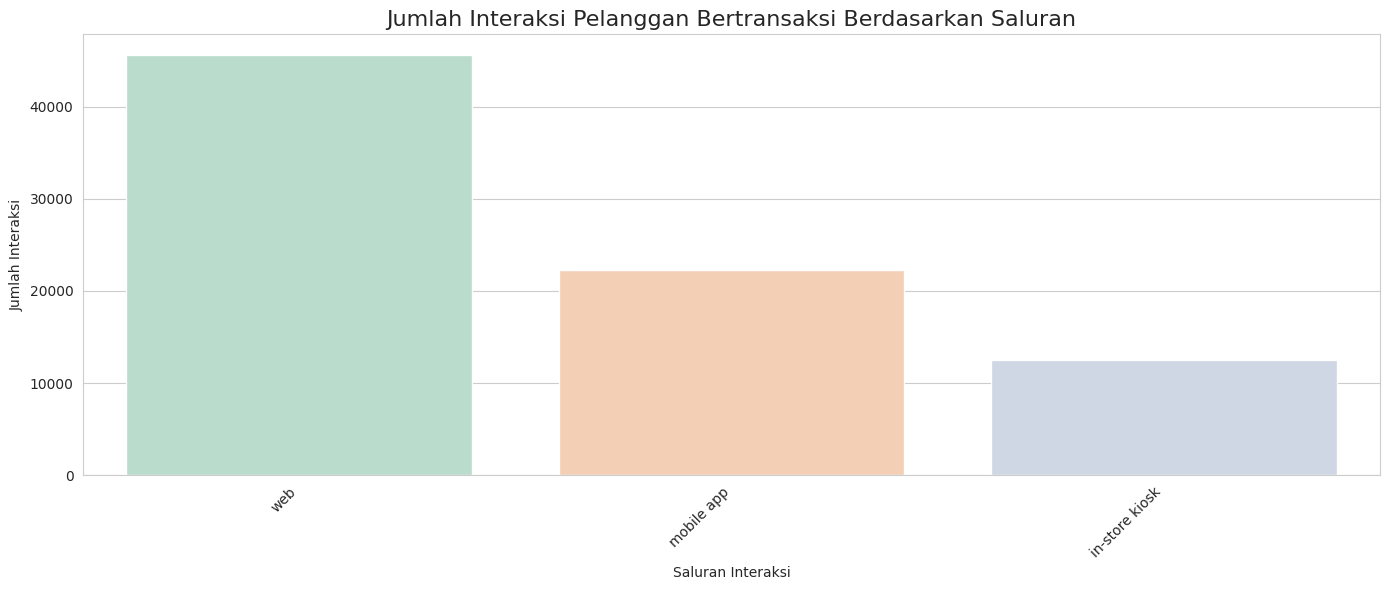


Berhasil mengidentifikasi 4994 pelanggan dengan dominant channel


In [131]:
# ANALISIS PENGALAMAN PELANGGAN (Q4)

print("Analisis Pengalaman Pelanggan")
print("-----------------------------")

# Saluran Interaksi Menjadi Transaksi, Mengidentifikasi pelanggan yang bertransaksi
transacting_customers = df_transactions_clean['customer_id'].unique()

# Melakukan filter interaksi yang dilakukan oleh pelanggan yang bertransaksi
df_interactions_transactors = df_interactions_clean[df_interactions_clean['customer_id'].isin(transacting_customers)].copy()

print("\nSaluran Interaksi Paling Sering Digunakan Pelanggan Bertransaksi")
print(channel_counts_transactors)

# Visualisasi Saluran Interaksi Pelanggan Bertransaksi
plt.figure(figsize=(14, 6))
sns.barplot(x=channel_counts_transactors.index, y=channel_counts_transactors.values, palette='Pastel2')
plt.title('Jumlah Interaksi Pelanggan Bertransaksi Berdasarkan Saluran', fontsize=16)
plt.xlabel('Saluran Interaksi')
plt.ylabel('Jumlah Interaksi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Menghitung frekuensi saluran interaksi
channel_counts_transactors = df_interactions_transactors['channel'].value_counts().drop('Unknown', errors='ignore')

# Menghitung frekuensi interaksi per customer dan channel, filter channel yang tidak kosong (NaN)
df_interactions_clean = df_interactions_clean.dropna(subset=['channel'])
channel_counts = df_interactions_clean.groupby(['customer_id', 'channel']).size().reset_index(name='count')

# Mencari channel dengan count tertinggi untuk setiap customer, sortir berdasarkan count, lalu drop duplicates
dominant_channel = channel_counts.sort_values(
    by='count',
    ascending=False
).drop_duplicates(subset=['customer_id'], keep='first')

# DataFrame untuk Channel Dominan
df_customer_channel = dominant_channel[['customer_id', 'channel']].rename(columns={'channel': 'dominant_channel'})
print(f"\nBerhasil mengidentifikasi {len(df_customer_channel)} pelanggan dengan dominant channel")



**Insight:**
Saluran **web** adalah titik interaksi paling sering yang terkait dengan pelanggan yang akhirnya melakukan transaksi. Ini mengkonfirmasi pentingnya saluran ini sebagai pendorong konversi dan harus menjadi fokus utama dalam optimasi UX/UI dan ketersediaan layanan.


Korelasi Umur vs. Diskon
Koefisien Korelasi (Umur vs. Diskon Diterima): -0.0013

Rata-Rata Diskon Diterima berdasarkan Gender:
gender
Non-binary           5.8613%
Prefer not to say    5.7075%
Unknown              5.4670%
Male                 5.2045%
Female               4.9643%
Name: discount_applied, dtype: object


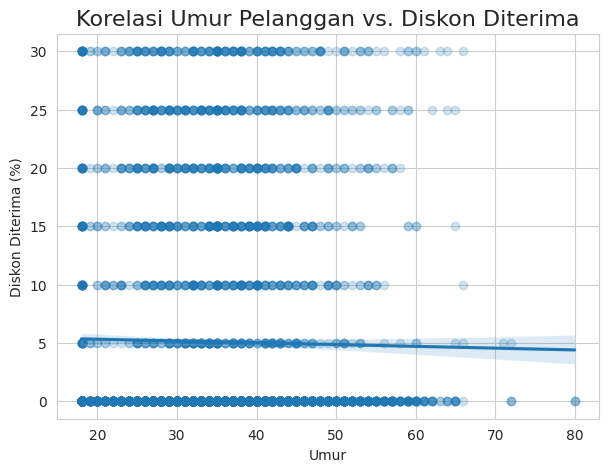

In [120]:
# Korelasi Umur vs. Diskon (Q5)

df_combined_age_discount = pd.merge(
    df_transactions_clean[['customer_id', 'discount_applied']],
    df_customers_clean[['customer_id', 'age', 'gender']],
    on='customer_id',
    how='left'
).dropna(subset=['age', 'gender'])

correlation_age_discount = df_combined_age_discount['age'].corr(df_combined_age_discount['discount_applied'])

print("\nKorelasi Umur vs. Diskon")
print(f"Koefisien Korelasi (Umur vs. Diskon Diterima): {correlation_age_discount:.4f}")

# Rata-Rata Diskon per Gender
avg_discount_by_gender = df_combined_age_discount.groupby('gender')['discount_applied'].mean().sort_values(ascending=False)
print("\nRata-Rata Diskon Diterima berdasarkan Gender:")
print(avg_discount_by_gender.map('{:.4f}%'.format))

# Visualisasi Korelasi Umur vs. Diskon
plt.figure(figsize=(7, 5))
sns.regplot(x='age', y='discount_applied', data=df_combined_age_discount.sample(5000), scatter_kws={'alpha':0.2})
plt.title('Korelasi Umur Pelanggan vs. Diskon Diterima', fontsize=16)
plt.xlabel('Umur')
plt.ylabel('Diskon Diterima (%)')
plt.show()


**Insight:**
Nilai korelasi ($r = -0.0013$) yang sangat mendekati nol menunjukkan bahwa tidak ada korelasi linier yang kuat antara usia pelanggan dan besarnya diskon yang mereka terima.
Kebijakan diskon saat ini tampaknya tidak berfokus pada segmentasi usia, atau diskon didistribusikan secara merata di semua kelompok usia.

Rata-Rata Nilai Transaksi (AOV) per Metode Pembayaran
-----------------------------------------------------
payment_method
Unknown Method    Rp 659.69
Cash              Rp 636.16
Apple Pay         Rp 624.43
Debit Card        Rp 621.67
Credit Card       Rp 621.61
PayPal            Rp 621.00
Gift Card         Rp 614.05
Google Pay        Rp 598.04
Name: price, dtype: object


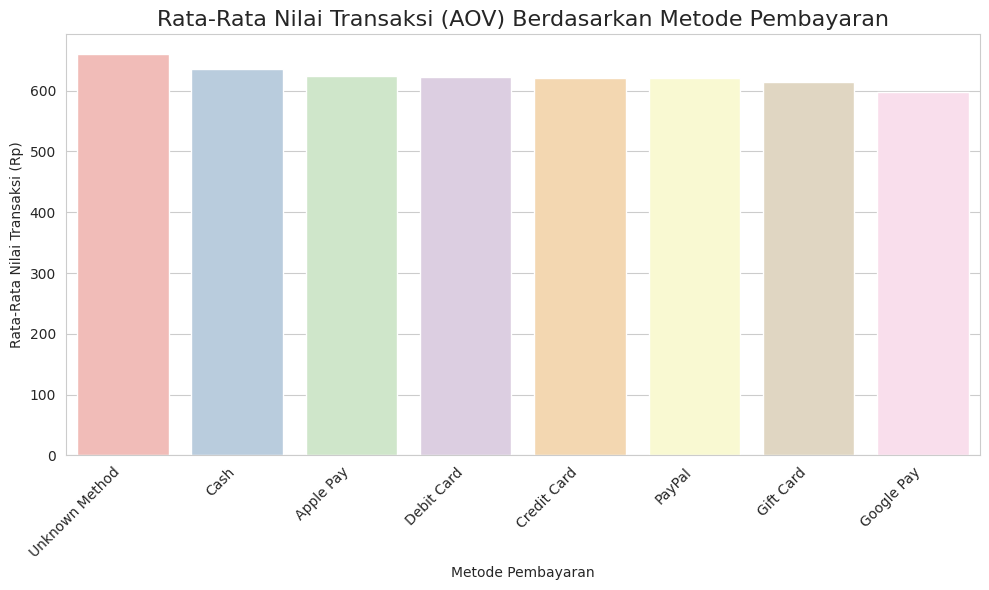

In [121]:
# Metode Pembayaran vs Rata-rata Nilai Transaksi (Q6)

avg_price_by_payment = df_transactions_clean.groupby('payment_method')['price'].mean().sort_values(ascending=False)

print("Rata-Rata Nilai Transaksi (AOV) per Metode Pembayaran")
print("-----------------------------------------------------")
print(avg_price_by_payment.map('Rp {:,.2f}'.format))

# Visualisasi AOV per Metode Pembayaran
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_payment.index, y=avg_price_by_payment.values, palette='Pastel1')
plt.title('Rata-Rata Nilai Transaksi (AOV) Berdasarkan Metode Pembayaran', fontsize=16)
plt.xlabel('Metode Pembayaran')
plt.ylabel('Rata-Rata Nilai Transaksi (Rp)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Insight:**
Metode pembayaran Unknown Method terkait dengan AOV tertinggi.
Ini dapat berarti pelanggan yang menggunakan metode ini cenderung membeli barang-barang mahal.
Fokus pada pengoptimalan *checkout* dan keamanan untuk metode pembayaran ini dapat membantu mempertahankan pendapatan tinggi.

Statistik Waktu Resolusi Tiket (Dalam Jam)
---------------------------------------------
Rata-Rata (Mean)             45.37
Median                       40.00
Standar Deviasi (Sebaran)    30.26
Name: resolution_time_hours, dtype: object


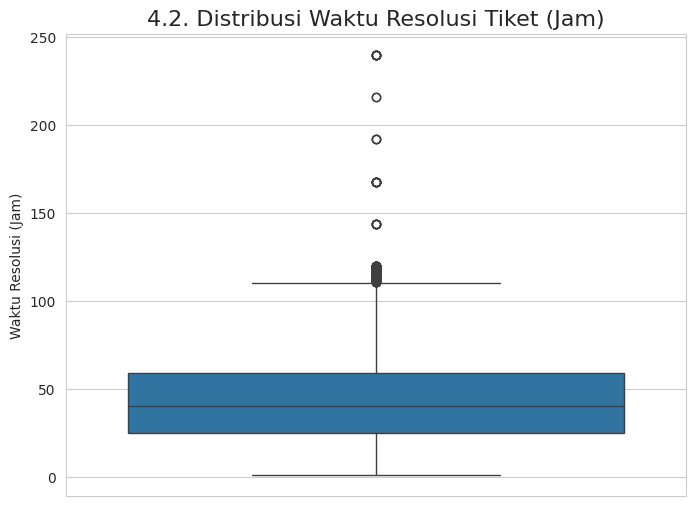

In [122]:
# B. Statistik Waktu Resolusi Tiket Dukungan (Q7)

resolution_stats = df_tickets_clean['resolution_time_hours'].agg(['mean', 'median', 'std']).rename({
    'mean': 'Rata-Rata (Mean)',
    'median': 'Median',
    'std': 'Standar Deviasi (Sebaran)'
})

print("Statistik Waktu Resolusi Tiket (Dalam Jam)")
print("---------------------------------------------")
print(resolution_stats.map('{:.2f}'.format))

# Visualisasi Distribusi Waktu Resolusi (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_tickets_clean['resolution_time_hours'])
plt.title('4.2. Distribusi Waktu Resolusi Tiket (Jam)', fontsize=16)
plt.ylabel('Waktu Resolusi (Jam)')
plt.show()


**Insight:**
Perbedaan antara Rata-Rata (45.37 jam) dan Median (40.00 jam) yang signifikan menunjukkan adanya *Outlier* (tiket yang sangat lambat diselesaikan) yang menarik rata-rata ke atas.

Standar Deviasi (30.26 jam) menunjukkan sebaran waktu resolusi yang tinggi. Prioritas harus diberikan untuk mengurangi *tail* dari distribusi ini dan mempercepat tiket-tiket yang membutuhkan waktu resolusi melebihi batas yang wajar.

In [ ]:
# Uji T-Test CSAT: Web vs. Mobile App (Q8)

print("Analisis Inferensial: Uji T-Test CSAT (Web vs. Mobile App)")
print("----------------------------------------------------------")

# Menggabungkan data Tiket (CSAT) dan Saluran Interaksi
df_customer_channel_mode = df_interactions_clean.groupby('customer_id')['channel'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
).reset_index(name='most_frequent_channel')

df_csat_channel = pd.merge(
    df_tickets_clean.dropna(subset=['customer_satisfaction_score']),
    df_customer_channel_mode,
    on='customer_id',
    how='left'
)

# Melakukan Filter data untuk Web dan Mobile App
csat_web = df_csat_channel[df_csat_channel['most_frequent_channel'] == 'web']['customer_satisfaction_score']
csat_mobile = df_csat_channel[df_csat_channel['most_frequent_channel'] == 'mobile app']['customer_satisfaction_score']

# Melakukan Uji T-Test
if len(csat_web) > 1 and len(csat_mobile) > 1:
    # Uji Levene's untuk menentukan equal_var
    stat_levene, p_levene = stats.levene(csat_web, csat_mobile, center='mean')
    equal_var = p_levene > 0.05

    # Uji T-Test Independen
    t_stat, p_value = stats.ttest_ind(csat_web, csat_mobile, equal_var=equal_var)
    alpha = 0.05

    mean_web = csat_web.mean()
    mean_mobile = csat_mobile.mean()

    print(f"Rata-Rata CSAT Web: {mean_web:.2f}")
    print(f"Rata-Rata CSAT Mobile App: {mean_mobile:.2f}")
    print(f"P-Value T-Test: {p_value:.4f}")

    if p_value < alpha:
        print("\nHasil: P-Value < Alpha")
        print("Kesimpulan: Tolak H0")
        print(f"Terdapat perbedaan signifikan dalam CSAT antara saluran Web dan Mobile App.")
    else:
        print("\nHasil: P-Value >= Alpha")
        print("Kesimpulan: Gagal Tolak H0 (Terima H0)")
        print("Tidak terdapat perbedaan signifikan secara statistik dalam CSAT antara pelanggan Web dan Mobile App.")
else:
print("[PERINGATAN]: Tidak cukup sampel untuk menjalankan Uji T-Test")

Analisis Inferensial: Uji T-Test CSAT (Web vs. Mobile App)
----------------------------------------------------------
Rata-Rata CSAT Web: 3.52
Rata-Rata CSAT Mobile App: 3.43
P-Value T-Test: 0.2713

Kesimpulan T-Test: Gagal Tolak H0
Tidak terdapat perbedaan signifikan secara statistik (p > 0.05) dalam CSAT antara pelanggan yang dominan menggunakan saluran Web dan Mobile App


H0 (Hipotesis Nol): Tidak terdapat perbedaan signifikan pada rata-rata Customer Satisfaction Score (CSAT) antara pelanggan yang berinteraksi melalui saluran 'Web' dan 'Mobile App'.

H1 (Hipotesis Alternatif): Terdapat perbedaan signifikan pada rata-rata Customer Satisfaction Score (CSAT) antara pelanggan yang berinteraksi melalui saluran 'Web' dan 'Mobile App'.

# VI. Pengambilan Kesimpulan

Pemasaran: Saluran Email Marketing memberikan ROI tertinggi, sementara kategori produk Furniture sering mendapat ulasan rendah dan perlu evaluasi kualitas.

Operasional: Metode pembayaran Credit Card menghasilkan nilai transaksi tertinggi, sehingga program promosi sebaiknya difokuskan pada pengguna kartu kredit.

Layanan Pelanggan: Fokus utama harus pada pengurangan outlier waktu resolusi tiket yang sangat lambat untuk meningkatkan konsistensi pelayanan, karena tingkat kepuasan (CSAT) saat ini sudah setara baik di Web maupun Mobile App.